In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rcParams["figure.figsize"] = (20,10)

def plot_quantile_compare_perf(log1,log2):
    with open(log1) as f:
        lines = f.readlines()
        x = []
        y1 = []
        for line in lines:
            x.append(float(line.split()[0]))
            time = float(line.split()[1])
            cost = float(line.split()[2])
            y1.append((cost/time)*1e-9)
            
    with open(log2) as f:
        lines = f.readlines()
        y2 = []
        for line in lines:
            time = float(line.split()[1])
            cost = float(line.split()[2])
            y2.append((cost/time)*1e-9)

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("size")
    plt.ylabel("GF/s")
    plt.plot(x,y1,'.',color='b')
    plt.plot(x,y2,'.',color='r')
    plt.show()
    
def plot_quantile_compare(log1,log2):
    with open(log1) as f:
        lines = f.readlines()
        x = []
        y1 = []
        for line in lines:
            x.append(float(line.split()[0]))
            y1.append(float(line.split()[1]))
            
    with open(log2) as f:
        lines = f.readlines()
        y2 = []
        for line in lines:
            y2.append(float(line.split()[1]))

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("size")
    plt.ylabel("log t(s)")
    plt.plot(x,y1,'.',color='b')
    plt.plot(x,y2,'.',color='r')
    plt.show()

In [9]:
def plot_quantile_compare1(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            x.append(float(line.split()[0]))
            y.append(float(line.split()[1]))
            

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("size")
    plt.ylabel("t(s)")
    plt.plot(x,y,'.',color='b')
    plt.show()
    
def plot_quantile_compare_perf1(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            x.append(float(line.split()[0]))
            time = float(line.split()[1])
            cost = float(line.split()[2])
            y.append((cost/time)*1e-9)
            

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("size")
    plt.ylabel("GF/s")
    plt.plot(x,y,'.',color='b')
    plt.show()

### axpy cache effects

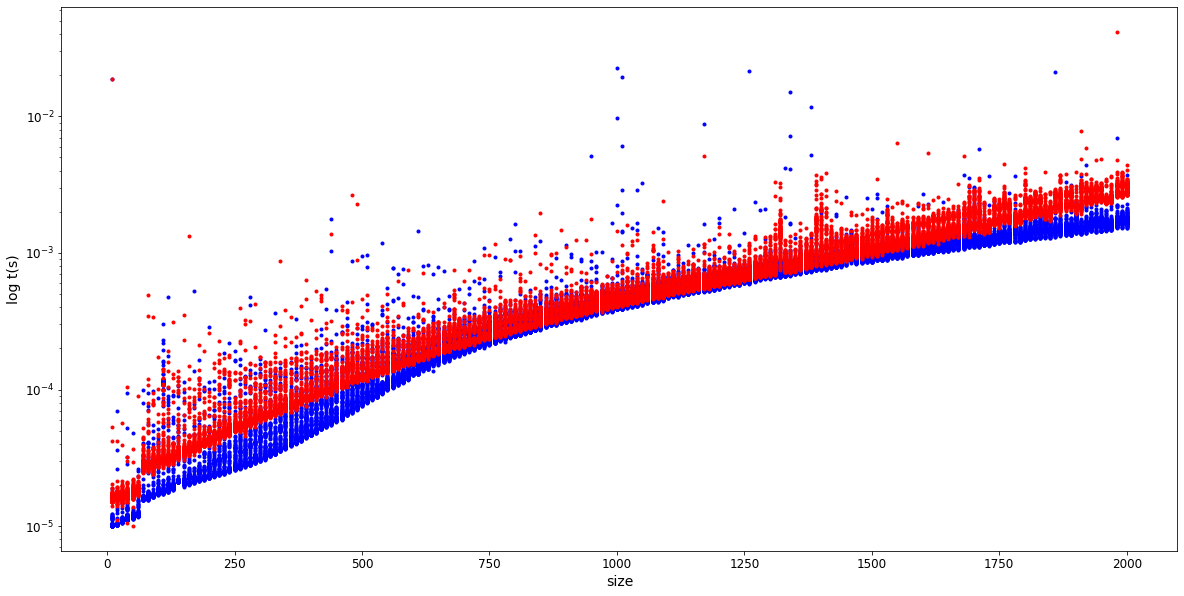

In [19]:
plt.yscale('log')
plot_quantile_compare("advanced_tests/logs/axpy.txt", "advanced_tests/logs/axpy_c.txt")

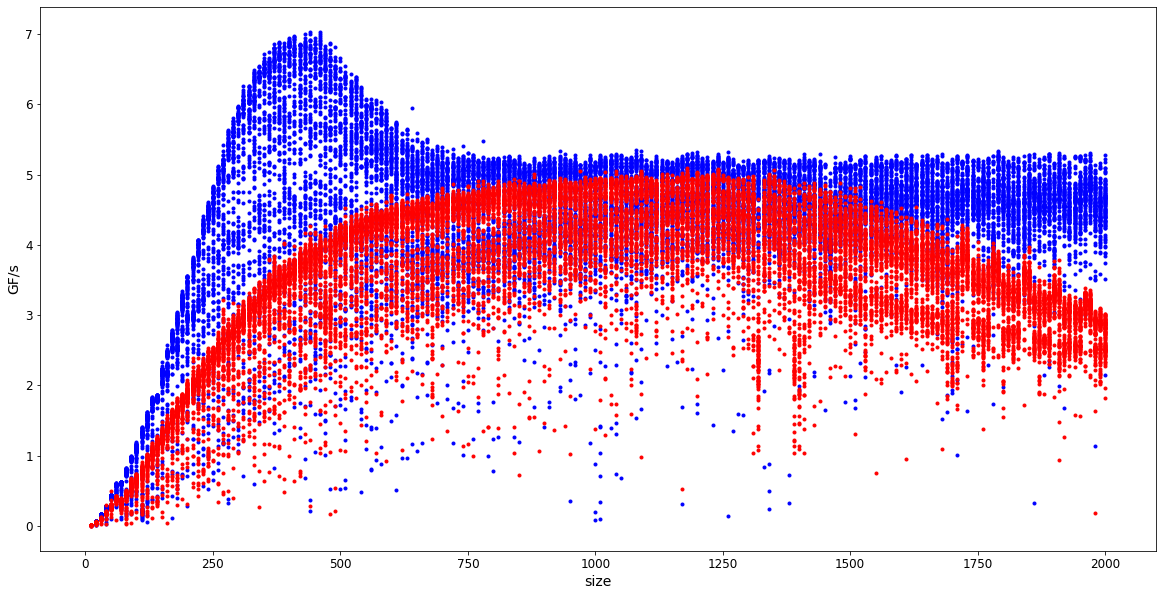

In [17]:
plot_quantile_compare_perf("advanced_tests/logs/axpy.txt", "advanced_tests/logs/axpy_c.txt")

### x+y cache effects

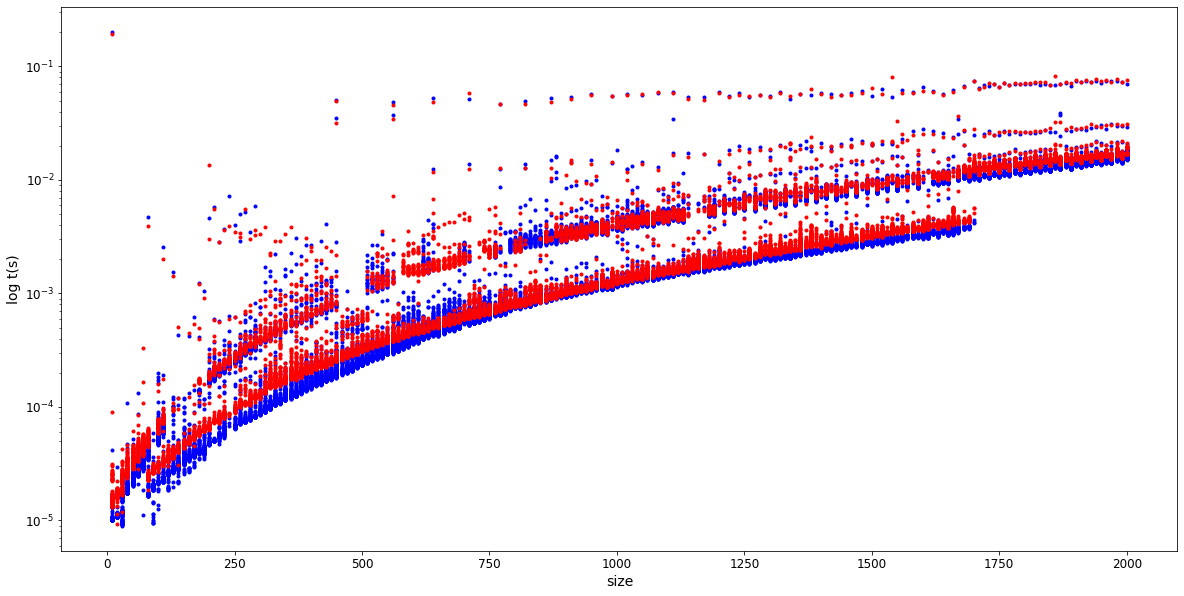

In [22]:
plt.yscale('log')
plot_quantile_compare("advanced_tests/logs/xpy.txt", "advanced_tests/logs/xpy_c.txt")

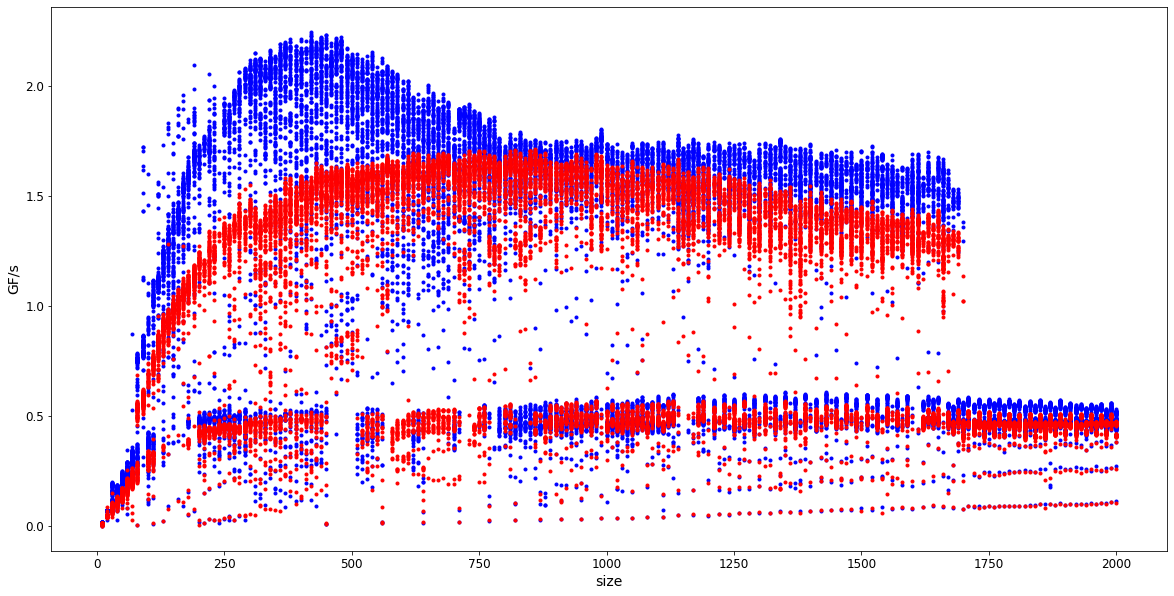

In [23]:
plot_quantile_compare_perf("advanced_tests/logs/xpy.txt", "advanced_tests/logs/xpy_c.txt")

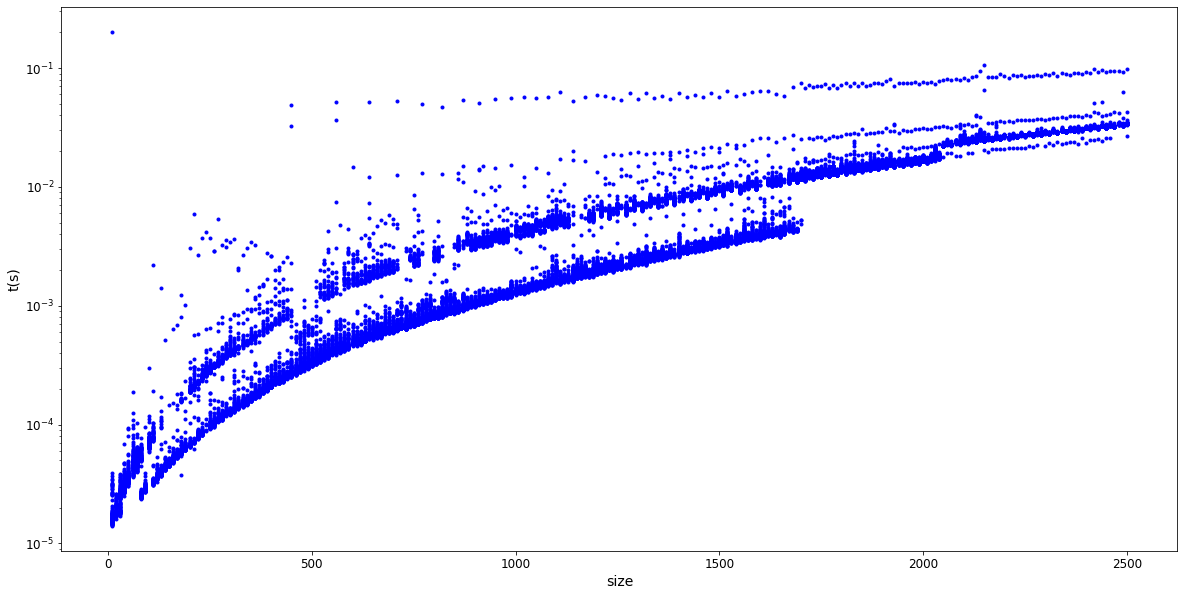

In [26]:
plt.yscale('log')
plot_quantile_compare1("advanced_tests/logs/xpy2500_c.txt")

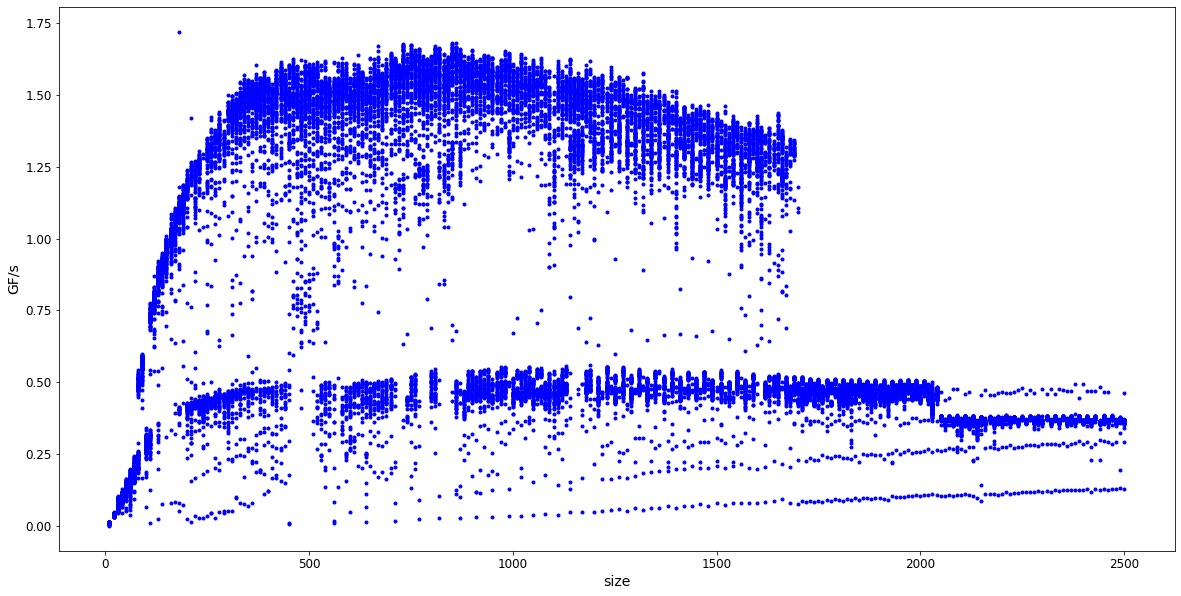

In [27]:
plot_quantile_compare_perf1("advanced_tests/logs/xpy2500_c.txt")

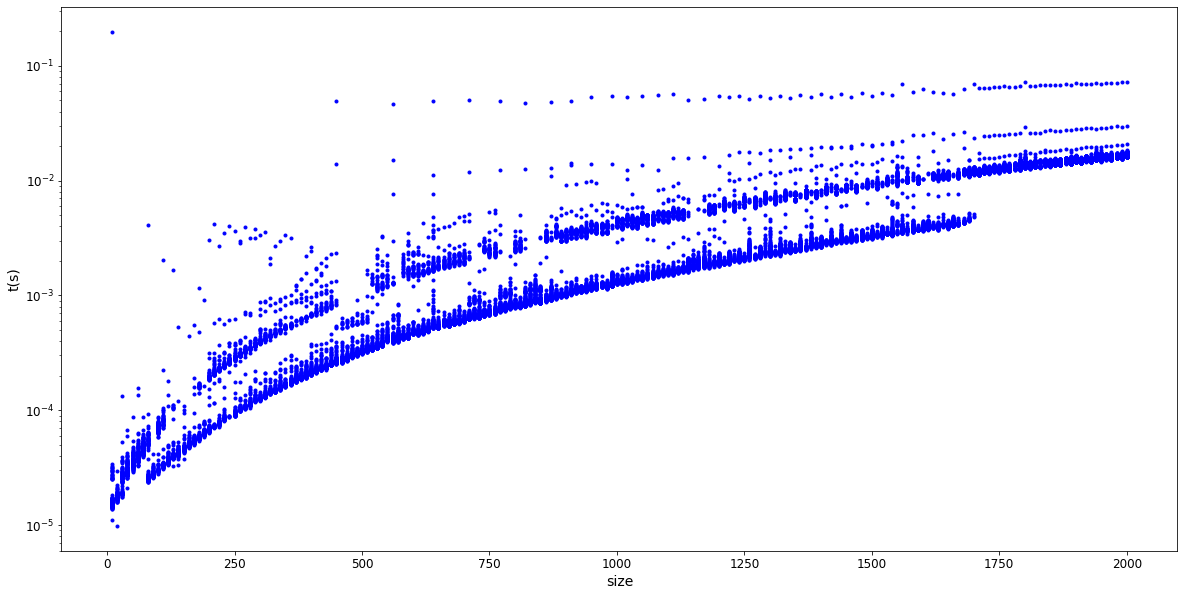

In [28]:
plt.yscale('log')
plot_quantile_compare1("advanced_tests/logs/xpy_1t_c.txt")

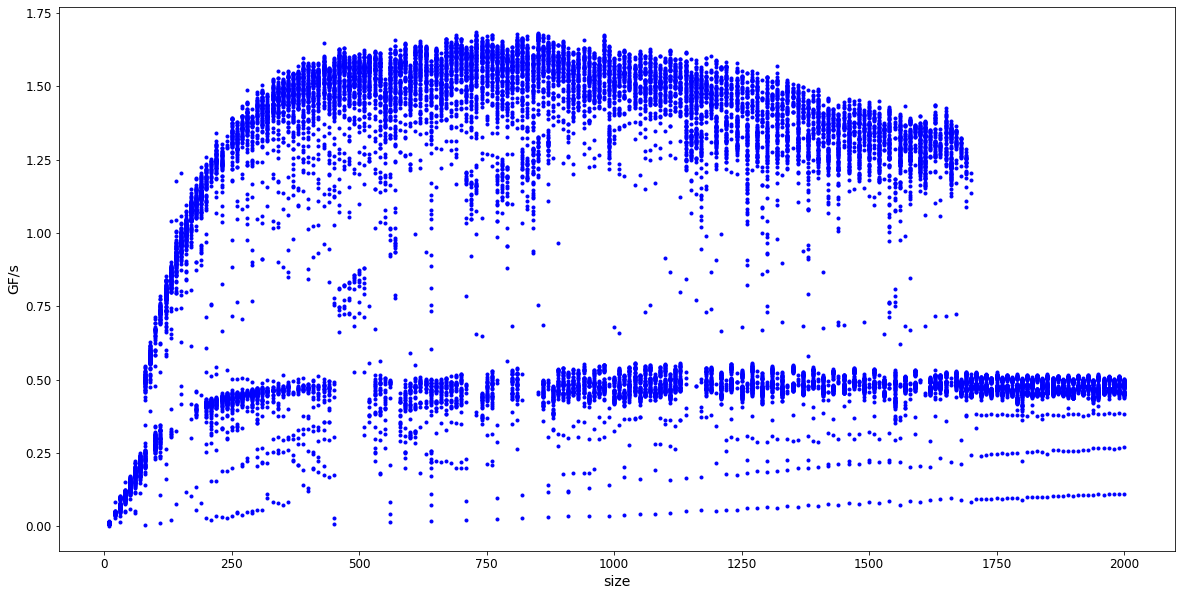

In [29]:
plot_quantile_compare_perf1("advanced_tests/logs/xpy_1t_c.txt")

### axpy vs x+y

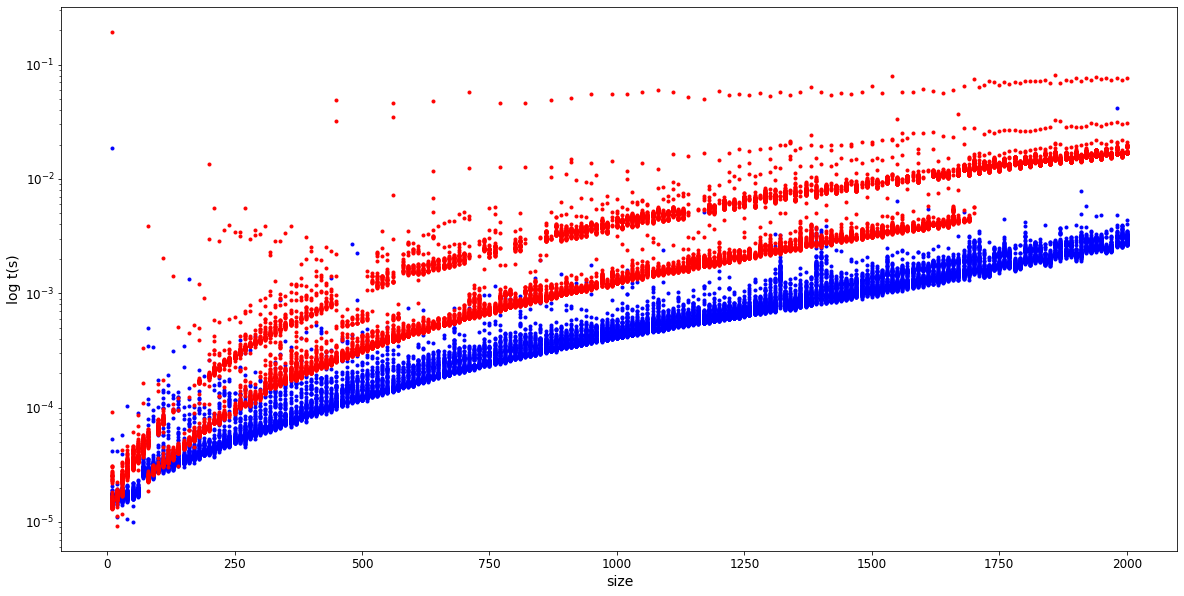

In [35]:
plt.yscale('log')
plot_quantile_compare("advanced_tests/logs/axpy_c.txt", "advanced_tests/logs/xpy_c.txt")

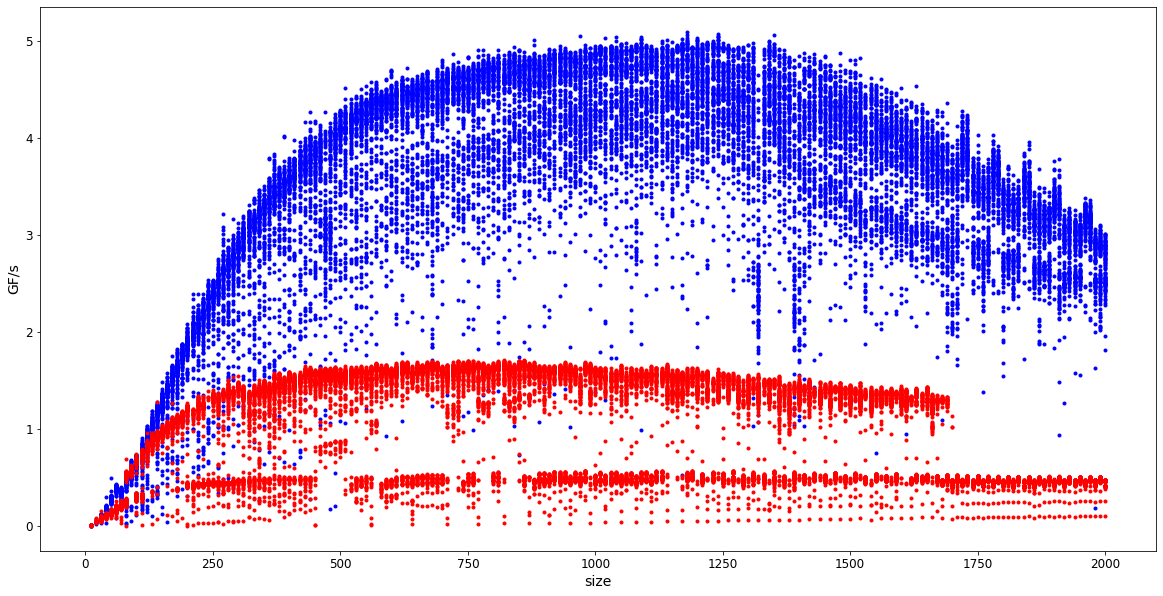

In [31]:
plot_quantile_compare_perf("advanced_tests/logs/axpy_c.txt", "advanced_tests/logs/xpy_c.txt")

### NOTE:

> axpy uses multiple threads efficiently

> x+y is a single threaded implementation

### Scalability of axpy

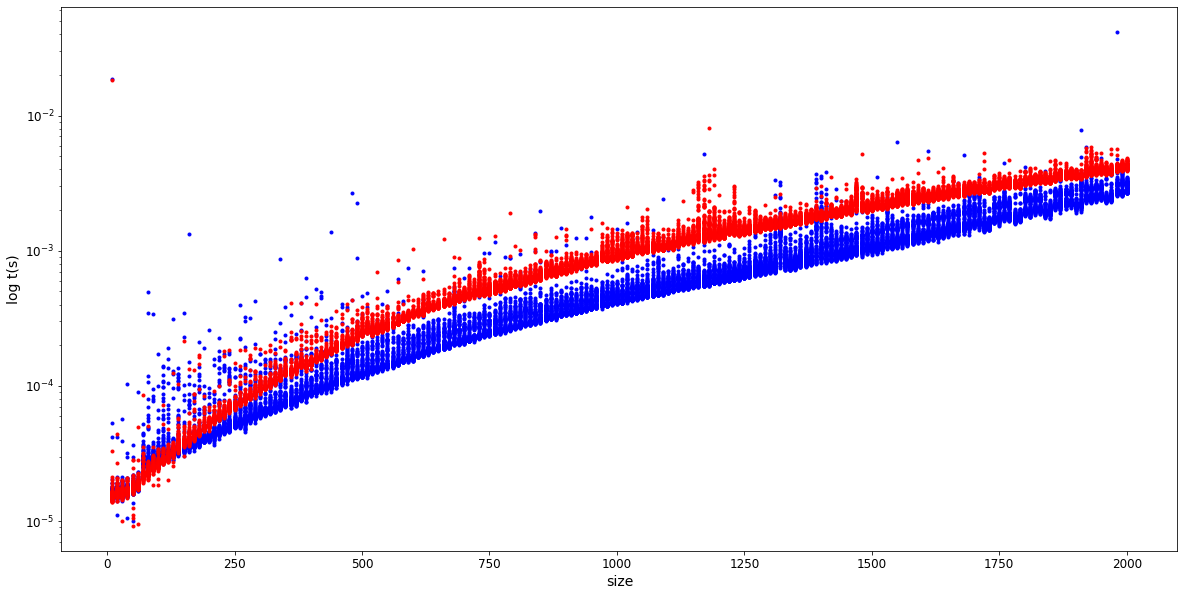

In [40]:
plt.yscale('log')
plot_quantile_compare("advanced_tests/logs/axpy_c.txt", "advanced_tests/logs/axpy_1t_c.txt")

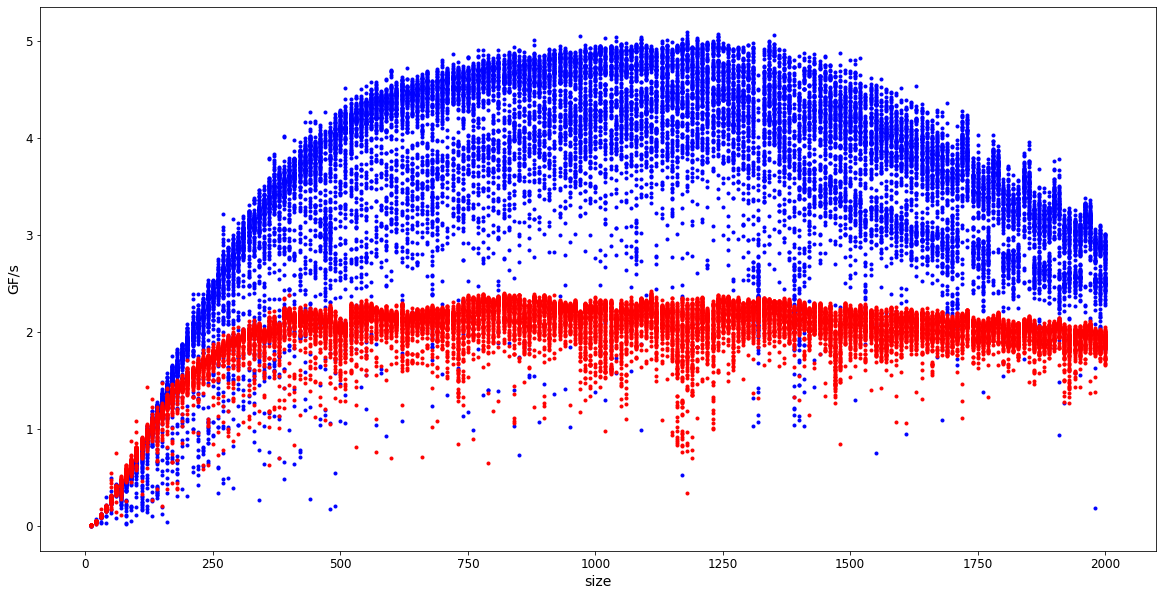

In [38]:
plot_quantile_compare_perf("advanced_tests/logs/axpy_c.txt", "advanced_tests/logs/axpy_1t_c.txt")

### GEMM vs MATCHAIN

**Blue** $AB$

> $A,B \in \mathbb{R}^{n \times n} \qquad \text{Cost : } 2n^{3}$

**Red** $A(BC)$

> $A,B \in \mathbb{R}^{n \times n} \\ C \in \mathbb{R}^{n \times \frac{n}{2}} \qquad \text{Cost : } 2n^{3}$

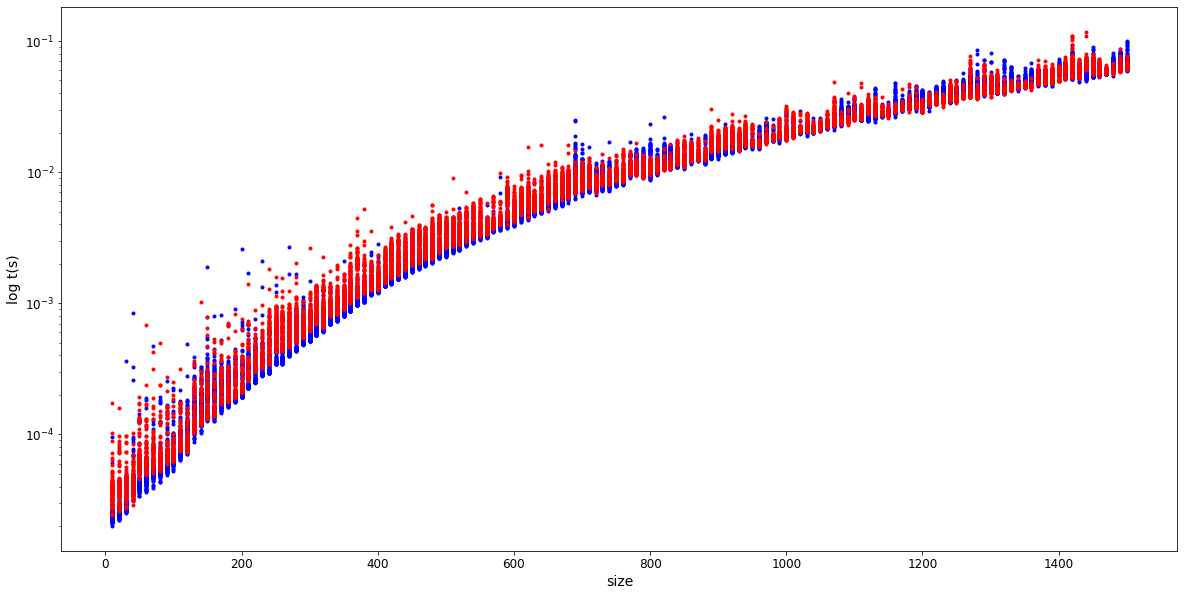

In [52]:
plt.yscale('log')
plot_quantile_compare("advanced_tests/logs/gemm_c1.txt", "advanced_tests/logs/matchain_c1.txt")

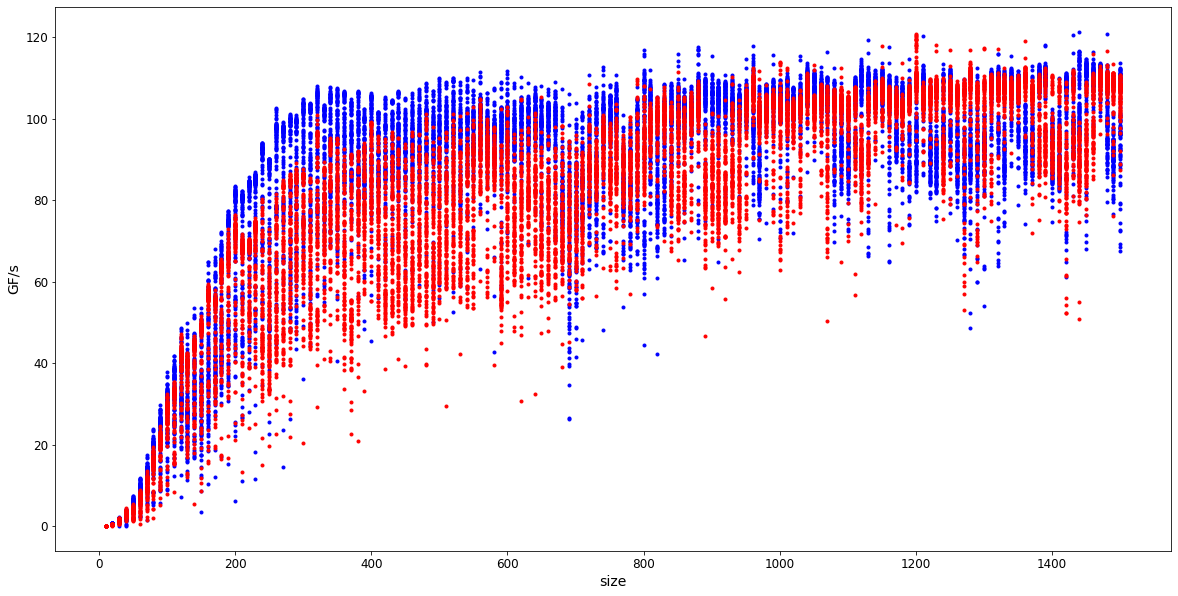

In [53]:
plot_quantile_compare_perf("advanced_tests/logs/gemm_c1.txt", "advanced_tests/logs/matchain_c1.txt")

### GEMM vs GEMM +

**Blue** $C = AB$

> $A,B \in \mathbb{R}^{n \times n} \qquad \text{Cost : } 2n^{3}$

**Red**  $C = AB + 2C$

> $A,B \in \mathbb{R}^{n \times n}  \qquad \text{Cost : } 2n^{3} + 2n^{2}$

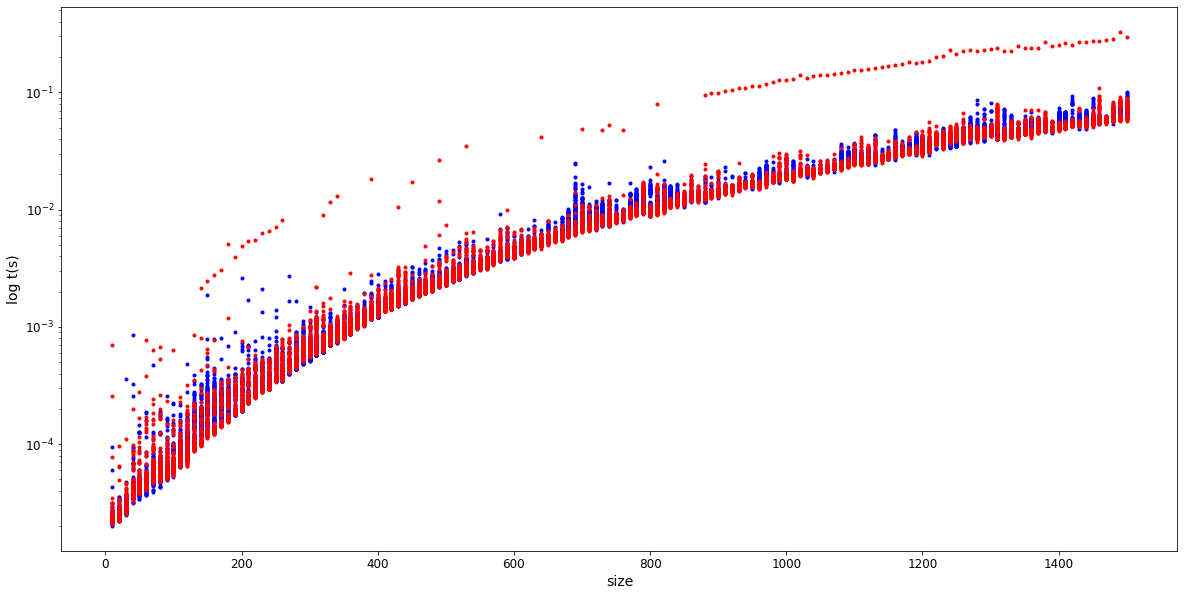

In [65]:
plt.yscale('log')
plot_quantile_compare("advanced_tests/logs/gemm_c1.txt", "advanced_tests/logs/gemm_2plus_c.txt")

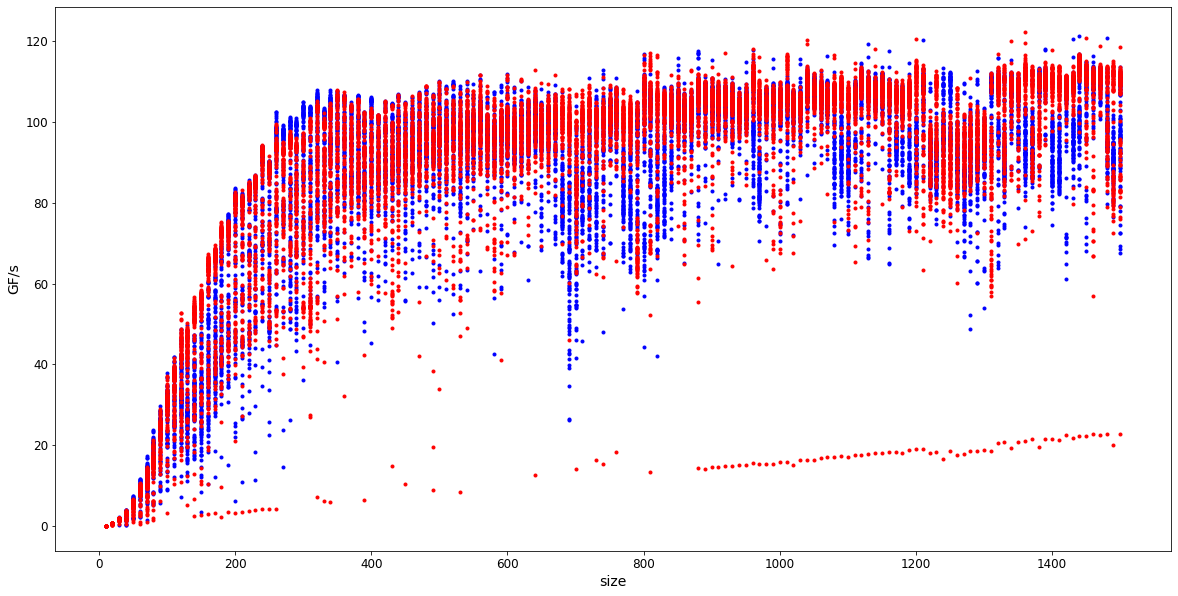

In [60]:
plot_quantile_compare_perf("advanced_tests/logs/gemm_c1.txt", "advanced_tests/logs/gemm_2plus_c.txt")

### GEMM + vs MATCHAIN

**Blue** $C = AB + 2C$

> $A,B \in \mathbb{R}^{n \times n} \qquad \text{Cost : } 2n^{3} + 2n^{2}$

**Red** $A(BC)$

> $A \in \mathbb{R}^{n \times n} \\B \in \mathbb{R}^{n \times 1} \\ C \in \mathbb{R}^{1 \times n} \qquad \text{Cost : } 2n^{3} + 2n^{2}$

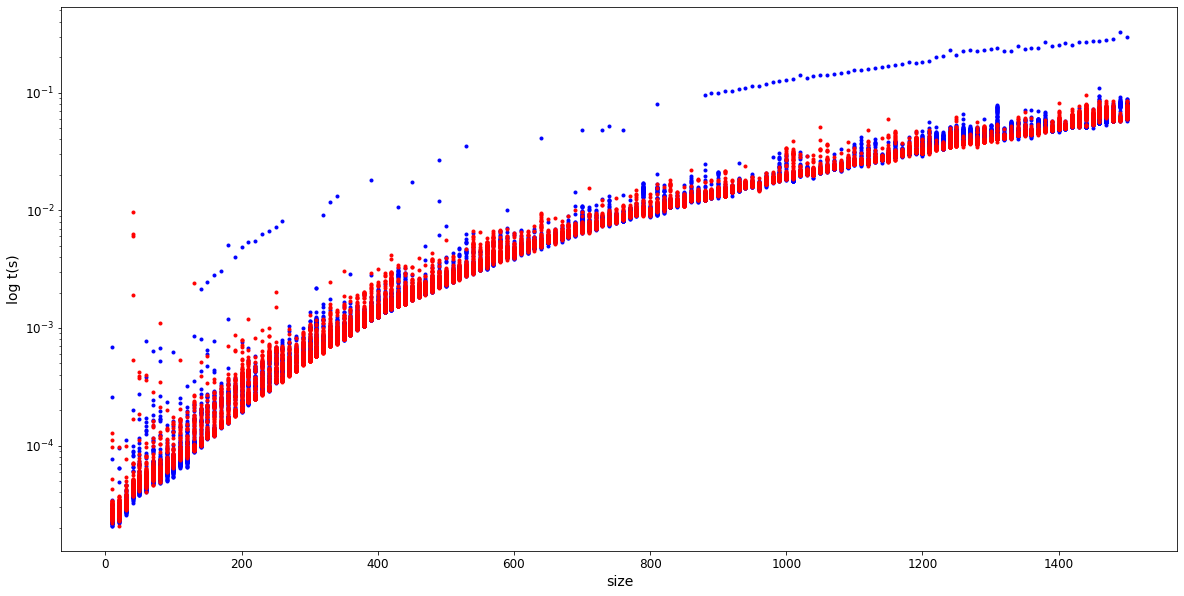

In [61]:
plt.yscale('log')
plot_quantile_compare("advanced_tests/logs/gemm_2plus_c.txt", "advanced_tests/logs/gemm_blas1_c.txt")

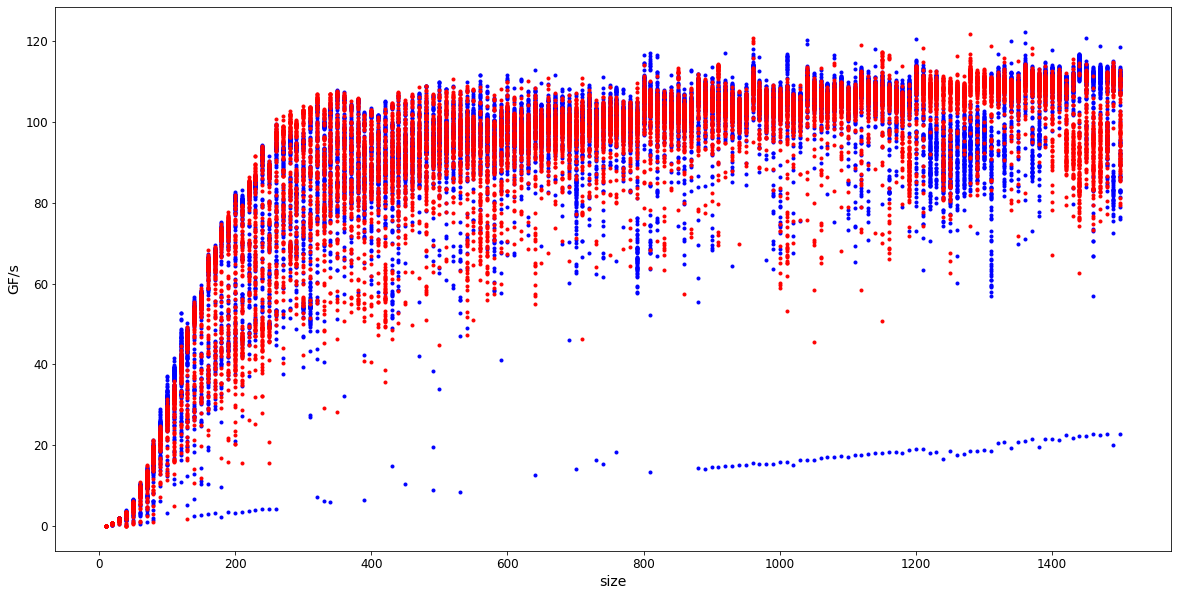

In [63]:
plot_quantile_compare_perf("advanced_tests/logs/gemm_2plus_c.txt", "advanced_tests/logs/gemm_blas1_c.txt")

### GEMM without cache trashing

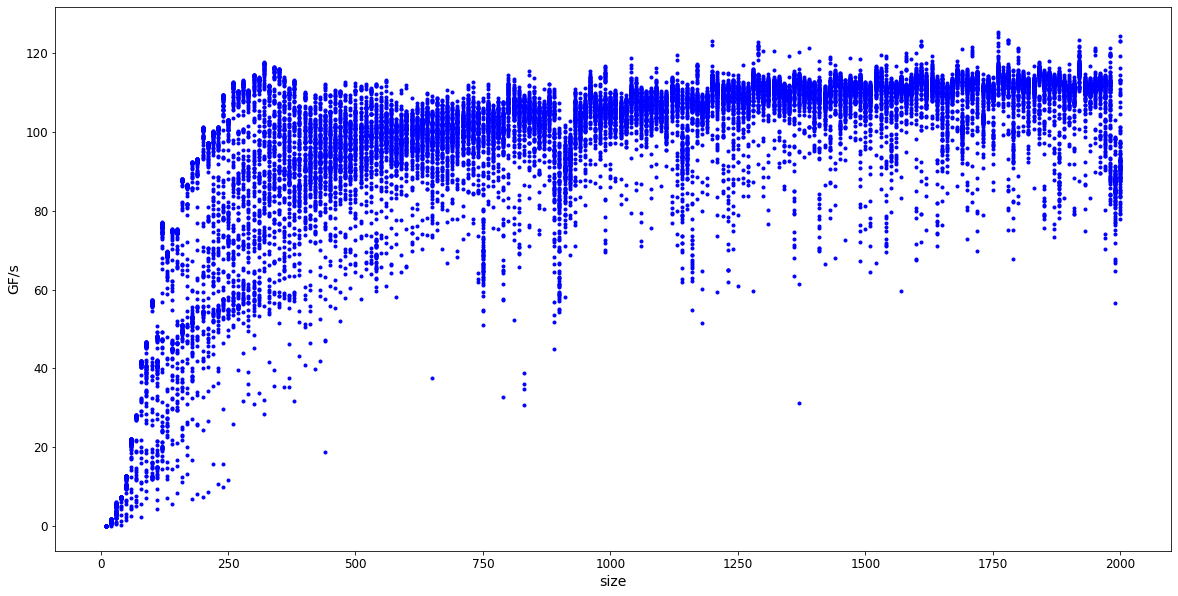

In [68]:
#plt.yscale('log')
plot_quantile_compare_perf1("advanced_tests/logs/gemm2000.txt")